Se importa la librería Pandas y se cargan los datos de entrenamiento

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import anderson
import joblib

In [3]:
# files.upload()

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip house-prices-advanced-regression-techniques.zip -d "/content/kaggledb"

Archive:  house-prices-advanced-regression-techniques.zip
replace /content/kaggledb/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
df = pd.read_csv("/content/kaggledb/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Diccionario de datos

| Atributo | Tipo | Subtipo |
| - | - | - |
|Id | Numérico | Discreto |
|MSSubClass | Numérico | Discreto |
|MSZoning | Categórico | Nominal |
|LotFrontage | Numérico | Continuo |
|LotArea | Numérico | Continuo |
|Street | Categórico | Nominal |
|Alley | Categórico | Nominal |
|LotShape | Categórico | Nominal |
|LandContour | Categórico | Nominal |
|Utilities | Categórico | Nominal |
|LotConfig | Categórico | Nominal |
|LandSlope | Categórico | Ordinal |
|Neighborhood | Categórico | Nominal |
|Condition1 | Categórico | Nominal |
|Condition2 | Categórico | Nominal |
|BldgType | Categórico | Nominal |
|HouseStyle | Categórico | Ordinal |
|OverallQual | Numérico | Discreto |
|OverallCond | Numérico | Discreto |
|YearBuilt | Numérico | Discreto |
|YearRemodAdd | Numérico | Discreto |
|RoofStyle | Categórico | Nominal |
|RoofMatl | Categórico | Nominal |
|Exterior1st | Categórico | Nominal |
|Exterior2nd | Categórico | Nominal |
|MasVnrType | Categórico | Nominal |
|MasVnrArea | Numérico | Continuo |
|ExterQual | Categórico | Ordinal |
|ExterCond | Categórico | Ordinal |
|Foundation | Categórico | Nominal |
|BsmtQual | Categórico | Ordinal |
|BsmtCond | Categórico | Ordinal |
|BsmtExposure | Categórico | Ordinal |
|BsmtFinType1 | Categórico | Ordinal |
|BsmtFinSF1 | Numérico | Continuo |
|BsmtFinType2 | Categórico | Ordinal |
|BsmtFinSF2 | Numérico | Continuo |
|BsmtUnfSF | Numérico | Continuo |
|TotalBsmtSF | Numérico | Continuo |
|Heating | Categórico | Nominal |
|HeatingQC | Categórico | Ordinal |
|CentralAir | Booleano | - |
|Electrical | Categórico | Nominal |
|1stFlrSF | Numérico | Continuo |
|2ndFlrSF | Numérico | Continuo |
|LowQualFinSF | Numérico | Continuo |
|GrLivArea | Numérico | Continuo |
|BsmtFullBath | Numérico | Discreto |
|BsmtHalfBath | Numérico | Discreto |
|FullBath | Numérico | Discreto |
|HalfBath | Numérico | Discreto |
|BedroomAbvGr | Numérico | Discreto |
|KitchenAbvGr | Numérico | Discreto |
|KitchenQual | Categórico | Ordinal |
|TotRmsAbvGrd | Numérico | Discreto |
|Functional | Categórico | Ordinal |
|Fireplaces | Numérico | Discreto |
|FireplaceQu | Categórico | Ordinal |
|GarageType | Categórico | Nominal |
|GarageYrBlt | Numérico | Discreto |
|GarageFinish | Categórico | Nominal |
|GarageCars | Numérico | Discreto |
|GarageArea | Numérico | Continuo |
|GarageQual | Categórico | Ordinal |
|GarageCond | Categórico | Ordinal |
|PavedDrive | Categórico | Nominal |
|WoodDeckSF | Numérico | Continuo |
|OpenPorchSF | Numérico | Continuo |
|EnclosedPorch | Numérico | Continuo |
|3SsnPorch | Numérico | Continuo |
|ScreenPorch | Numérico | Continuo |
|PoolArea | Numérico | Continuo |
|PoolQC | Categórico | Ordinal |
|Fence | Categórico | Nominal |
|MiscFeature | Categórico | Nominal |
|MiscVal | Numérico | Continuo |
|MoSold | Numérico | Discreto |
|YrSold | Numérico | Discreto |
|SaleType | Categórico | Nominal |
|SaleCondition | Categórico | Nominal |
|SalePrice | Numérico | Continuo |

# *Exploración y transformación de los datos*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [345]:
cat_df_names = df.select_dtypes(include = "object").columns

### Imputación de valores faltantes

In [14]:
# Numéricas
df["LotFrontage"].fillna(0, inplace=True)
df["MasVnrArea"].fillna(0, inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)

# Categóricas
df["Alley"].fillna("None", inplace=True)
df["MasVnrType"].fillna("None", inplace=True)
df["BsmtQual"].fillna("None", inplace=True)
df["BsmtCond"].fillna("None", inplace=True)
df["BsmtExposure"].fillna("None", inplace=True)
df["BsmtFinType1"].fillna("None", inplace=True)
df["BsmtFinType2"].fillna("None", inplace=True)
df["Electrical"].fillna(df["Electrical"].describe().top, inplace=True)
df["FireplaceQu"].fillna("None", inplace=True)
df["GarageType"].fillna("None", inplace=True)
df["GarageFinish"].fillna("None", inplace=True)
df["GarageQual"].fillna("None", inplace=True)
df["GarageCond"].fillna("None", inplace=True)
df["PoolQC"].fillna("None", inplace=True)
df["Fence"].fillna("None", inplace=True)
df["MiscFeature"].fillna("None", inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


Se convierten las variables categóricas a variables dummy

In [24]:
df_categoric = [cname for cname in df.columns if df[cname].dtype == "object"]

df = pd.get_dummies(df, columns = df_categoric)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [25]:
df.shape

(1460, 304)

# *Identificar distribución de variables*
Se obtuvieron gráficas para identificar si las variables tienen o no una distribución normal

In [33]:
df_num = df.select_dtypes(include=["int64","float64"])
df_num.shape

(1460, 38)

In [34]:
df_num.drop(columns=["Id",],inplace=True)

In [35]:
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000.0


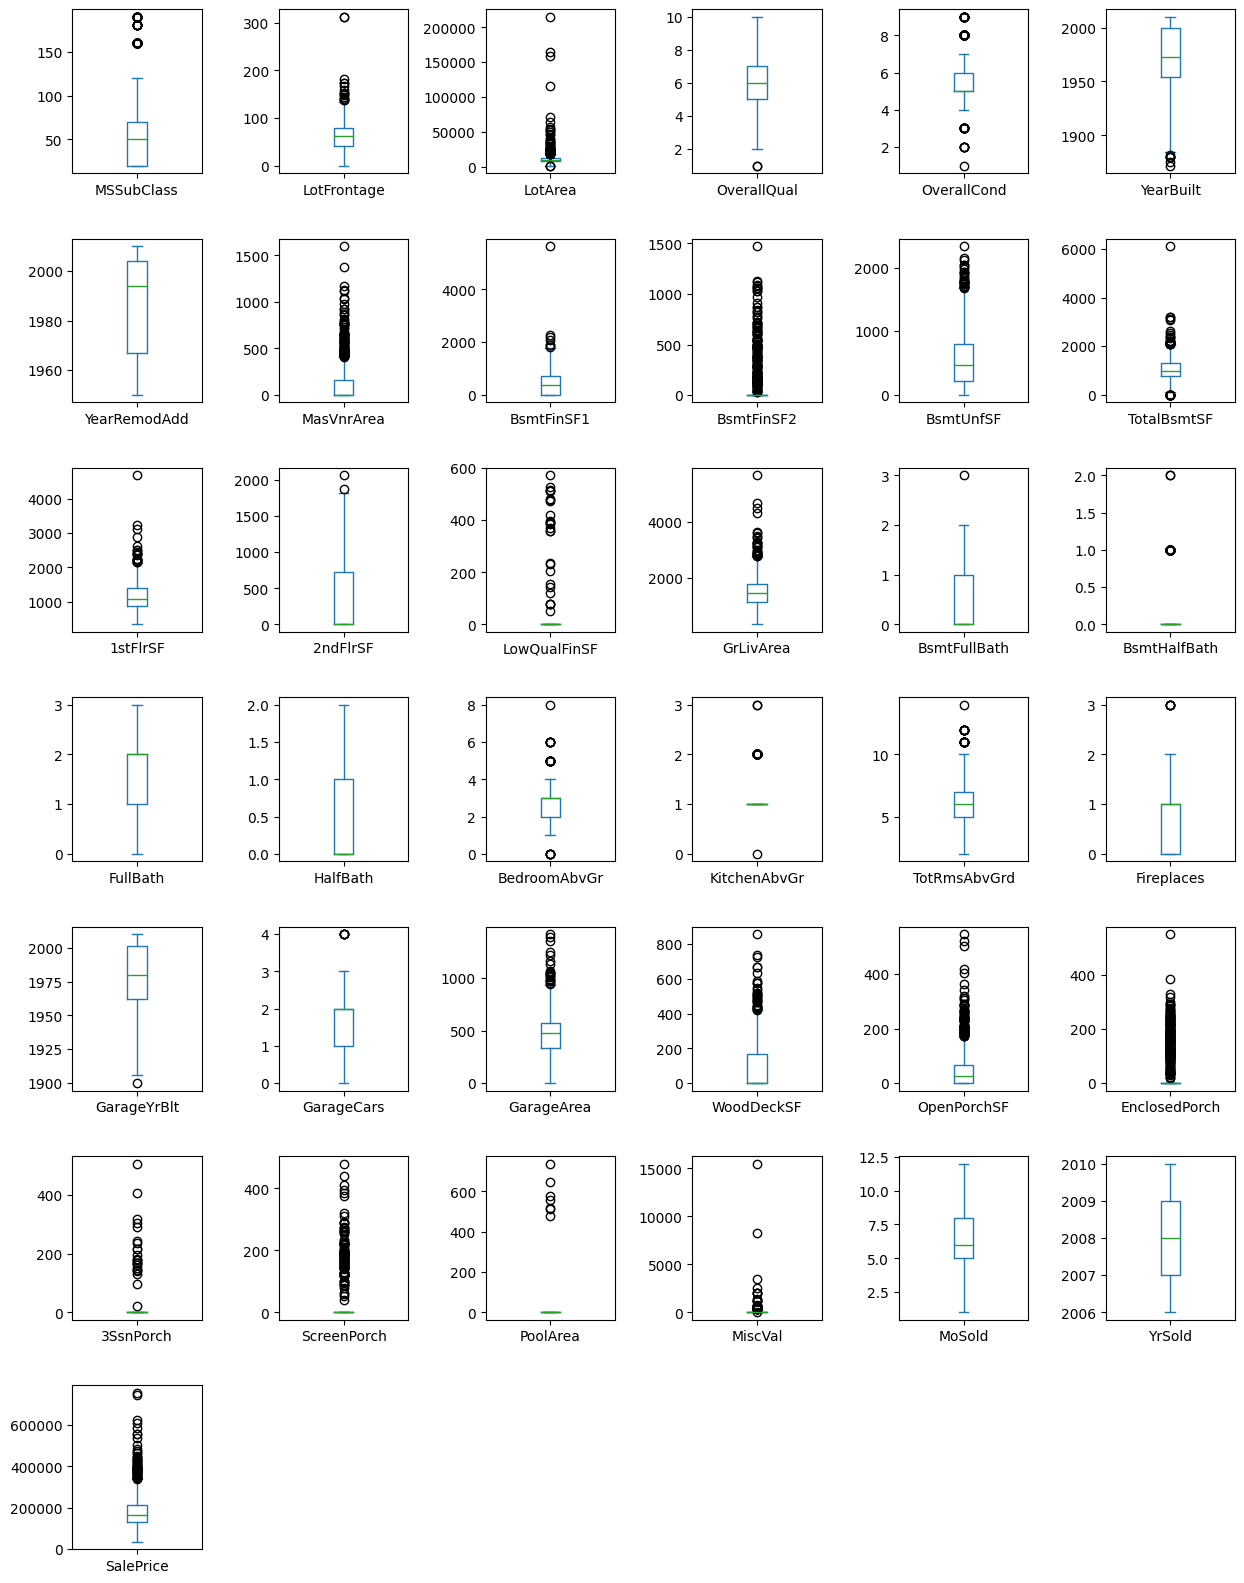

In [48]:
# for i in range(df_num.shape[1]):
#     # Selecciona la columna por índice y crea el boxplot
#     df_num.iloc[:, i].plot(kind="box")
#     # Agrega título y muestra el gráfico
#     plt.title(df_num.columns[i])
#     plt.show()

fig = plt.figure(figsize=(15, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.6)
for i in range(37):
    ax = fig.add_subplot(7, 6, i+1)
    df_num.iloc[:, i].plot(kind="box")

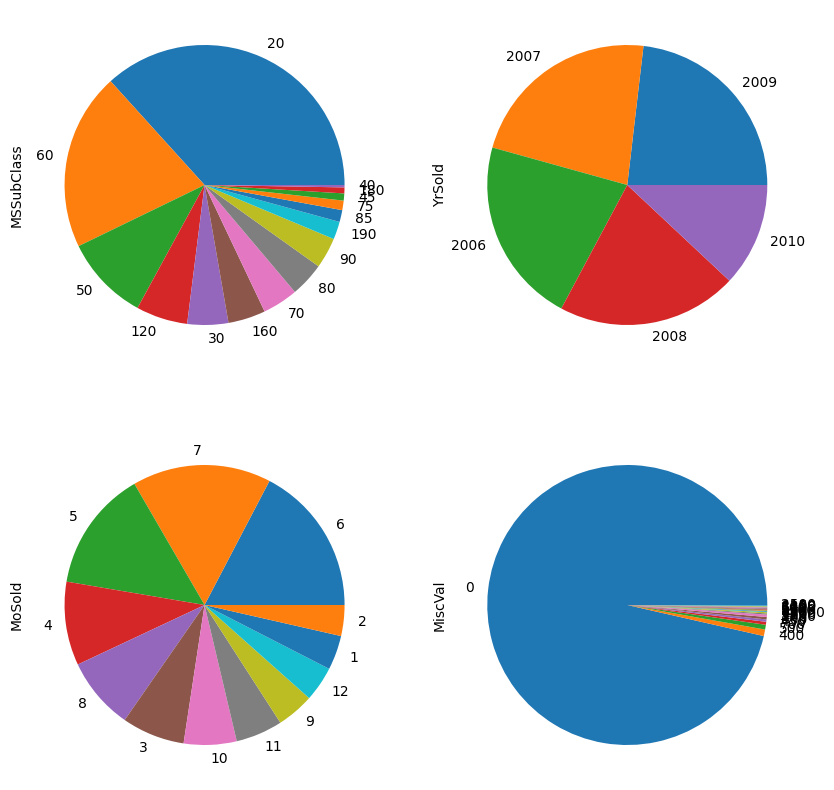

In [51]:
df_cat = df_num[['MSSubClass','YrSold','MoSold','MiscVal']]

pies = ['MSSubClass','YrSold','MoSold','MiscVal']

# for m in pies:
#     # Selecciona la columna por índice y crea el boxplot
#     df_cat[m].value_counts().plot(kind='pie')
#     # Agrega título y muestra el gráfico
#     plt.title(m)
#     plt.show()

fig = plt.figure(figsize=(10, 10))
# fig.subplots_adjust(hspace=0.4, wspace=0.6)
for i, m in enumerate(pies):
    ax = fig.add_subplot(2, 2, i+1)
    df_cat[m].value_counts().plot(kind='pie')

Estos valores son discretos y son más como valores categóricos, por lo que se usó una gráfica circular en vez de un histograma para representar su distribución.
Se observa que hay un sesgo para los valores más pequeños; esto indica que la distribución no es normal.

<ipython-input-40-0802c48c14d5>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_num.hist(ax=ax)


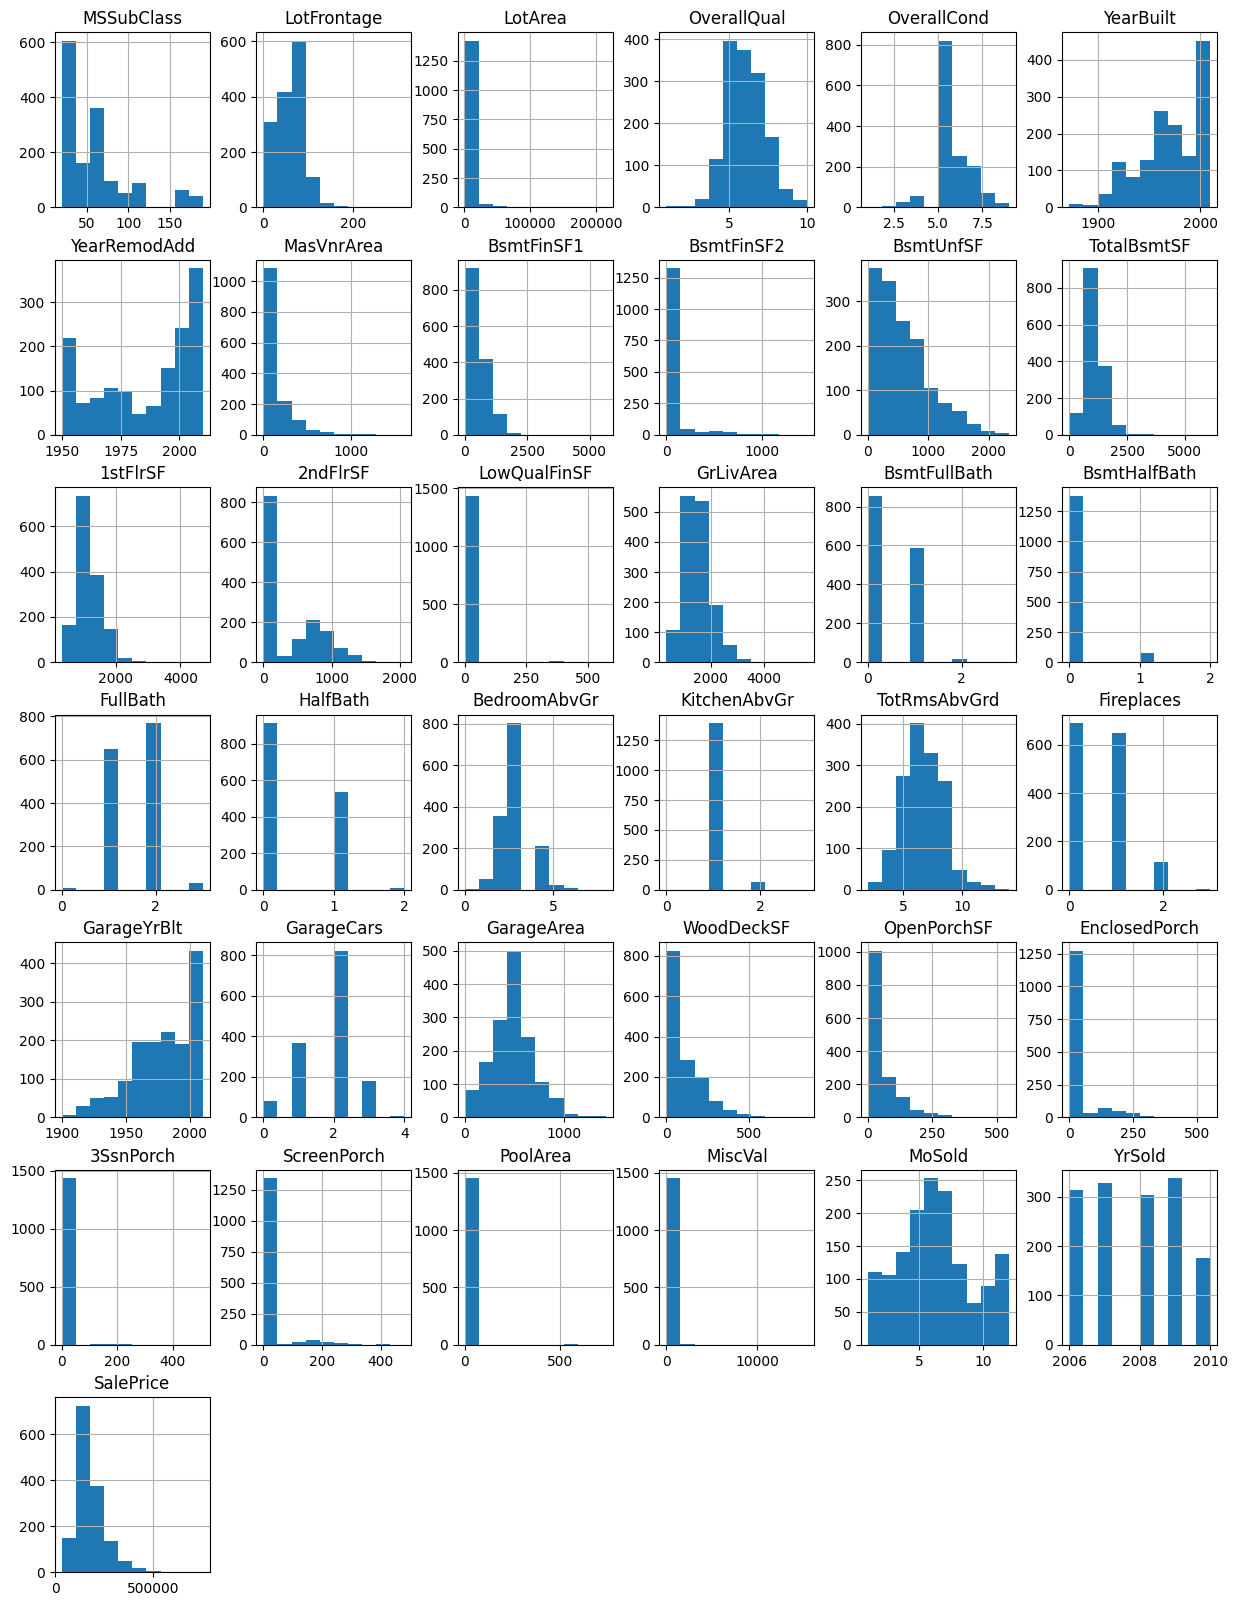

In [40]:
# for j in range(df_num.shape[1]):
#     # Selecciona la columna por índice y crea el boxplot
#     df_num.iloc[:, j].hist(bins=20)
#     # Agrega título y muestra el gráfico
#     plt.title(df_num.columns[j])
#     plt.show()

fig, ax = plt.subplots(figsize=(15,20))
df_num.hist(ax=ax)
plt.show()

In [156]:
# Iterar sobre todas las columnas del DataFrame
for column in df_num.columns:
    print(f"Column: {column}")  # Imprimir el nombre de la columna
    data = df_num[column]
    result = anderson(data, dist='norm')

    print('Statistic: %.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print('%.3f: %.3f, Data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, Data does not look normal (reject H0)' % (sl, cv))

    print("\n")  # Salto de línea después de cada columna

Column: MSSubClass
Statistic: 89.247
15.000: 0.574, Data does not look normal (reject H0)
10.000: 0.654, Data does not look normal (reject H0)
5.000: 0.785, Data does not look normal (reject H0)
2.500: 0.916, Data does not look normal (reject H0)
1.000: 1.089, Data does not look normal (reject H0)


Column: LotFrontage
Statistic: 42.804
15.000: 0.574, Data does not look normal (reject H0)
10.000: 0.654, Data does not look normal (reject H0)
5.000: 0.785, Data does not look normal (reject H0)
2.500: 0.916, Data does not look normal (reject H0)
1.000: 1.089, Data does not look normal (reject H0)


Column: LotArea
Statistic: 198.418
15.000: 0.574, Data does not look normal (reject H0)
10.000: 0.654, Data does not look normal (reject H0)
5.000: 0.785, Data does not look normal (reject H0)
2.500: 0.916, Data does not look normal (reject H0)
1.000: 1.089, Data does not look normal (reject H0)


Column: OverallQual
Statistic: 35.230
15.000: 0.574, Data does not look normal (reject H0)
10.000:

In [157]:
for column in df_num.columns:
    print(f"Column: {column}")
    print(df_num[column].describe(), "\n")

Column: MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64 

Column: LotFrontage
count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64 

Column: LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64 

Column: OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64 

Column: OverallCond
count    1460.000000
mean        5.575342
std         1.112799
min         1.0

La medida de tendencia central que describe mejor los datos numéricos es la mediana porque ningún atributo sigue una ditribución normal.

La medida de variabilidad que la describe mejor es el rango intercuartil porque ésta es la medida asociada con la mediana.

# *Pruebas de calidad*
Se busca identificar los outliers de cada categoría.

Se obtiene la cantidad de casas que corresponden a diferentes índices de calidad

In [158]:
quality = df["OverallQual"].value_counts()

Se ordenan por nivel de calidad

In [159]:
quality.sort_index(inplace=True)

Se grafica un histograma

<Axes: >

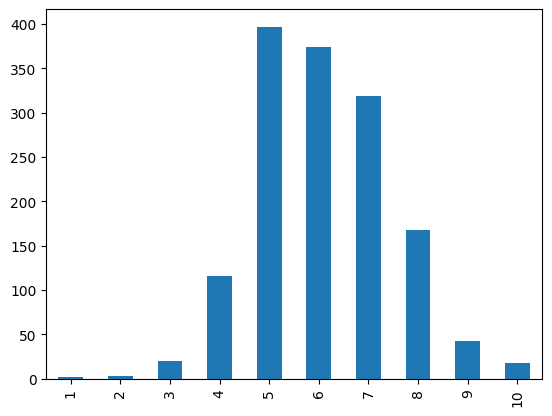

In [160]:
quality.plot(kind="bar")

Se guerdan los precios de las casas según su nivel de calidad; esto se hace para comparar los precios de casas de diferente calidad

In [161]:
qualP = []
for i in range(1, 11):
  qualP.append(df[df["OverallQual"] == i])

Las siguientes 10 gráficas muestran la distribución de los datos de los precios de las casas según su nivel de calidad

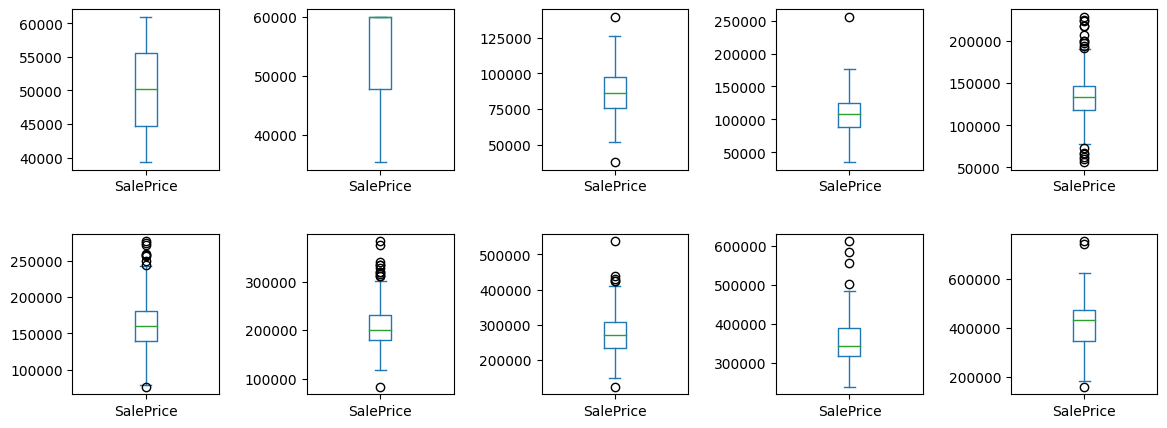

In [164]:
# qualP[0]["SalePrice"].plot(kind="box")

fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.6)
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    qualP[i]["SalePrice"].plot(kind="box")

# *Quality Analysis*

In [165]:
unique_overall_qual = df['OverallQual'].unique()
qual_dataframes = {} #crea un diccionario vacío

# Crear dataframes separados para cada valor de OverallQual
for qual_value in unique_overall_qual:
    qual_df = df[df['OverallQual'] == qual_value][['OverallQual', 'SalePrice']]

    #qual_df.reset_index(drop=True, inplace=True)

    qual_dataframes[qual_value] = qual_df

print("Dataframe para OverallQual = 3:")
print(qual_dataframes[10])

# dataframeq1 = qual_dataframes[0]
# dataframeq2 = qual_dataframes[1]
# dataframeq3 = qual_dataframes[2]
# dataframeq4 = qual_dataframes[3]
# dataframeq5 = qual_dataframes[4]
# dataframeq6 = qual_dataframes[5]
# dataframeq7 = qual_dataframes[6]
# dataframeq8 = qual_dataframes[7]
# dataframeq9 = qual_dataframes[8]
# dataframeq10 = qual_dataframes[9]

Dataframe para OverallQual = 3:
      OverallQual  SalePrice
58             10   438780.0
185            10   475000.0
224            10   386250.0
389            10   426000.0
440            10   555000.0
515            10   402861.0
523            10   184750.0
583            10   325000.0
591            10   451950.0
691            10   755000.0
825            10   385000.0
994            10   337500.0
1169           10   625000.0
1182           10   745000.0
1243           10   465000.0
1298           10   160000.0
1373           10   466500.0
1442           10   310000.0


In [166]:
list_mean_cat_sale = []
for i in range(1, 11):
    dataframe = qual_dataframes[i]
    min_sale_price = dataframe['SalePrice'].min()
    mean_sale_price = dataframe['SalePrice'].mean()
    max_sale_price = dataframe['SalePrice'].max()
    list_mean_cat_sale.append(mean_sale_price)

    print(f"Para OverallQual = {i}:")
    print(f"  - Valor mínimo de SalePrice: {min_sale_price}")
    print(f"  - Valor promedio de SalePrice: {mean_sale_price}")
    print(f"  - Valor máximo de SalePrice: {max_sale_price}")
    print("\n")


Para OverallQual = 1:
  - Valor mínimo de SalePrice: 39299.99999999998
  - Valor promedio de SalePrice: 50150.000000000015
  - Valor máximo de SalePrice: 61000.000000000044


Para OverallQual = 2:
  - Valor mínimo de SalePrice: 35311.000000000015
  - Valor promedio de SalePrice: 51770.33333333335
  - Valor máximo de SalePrice: 60000.00000000002


Para OverallQual = 3:
  - Valor mínimo de SalePrice: 37899.99999999998
  - Valor promedio de SalePrice: 87473.75
  - Valor máximo de SalePrice: 139600.00000000006


Para OverallQual = 4:
  - Valor mínimo de SalePrice: 34900.00000000001
  - Valor promedio de SalePrice: 108420.6551724138
  - Valor máximo de SalePrice: 256000.00000000012


Para OverallQual = 5:
  - Valor mínimo de SalePrice: 55992.99999999998
  - Valor promedio de SalePrice: 133523.34760705288
  - Valor máximo de SalePrice: 228949.99999999997


Para OverallQual = 6:
  - Valor mínimo de SalePrice: 75999.99999999999
  - Valor promedio de SalePrice: 161603.0347593583
  - Valor máxim

In [167]:
outliers_df = pd.DataFrame(columns=['OverallQual', 'SalePrice'])

for i in range(1, 11):
    dataframe = qual_dataframes[i]

    # Calcular el rango intercuartil (IQR)
    Q1 = dataframe['SalePrice'].quantile(0.25)
    Q3 = dataframe['SalePrice'].quantile(0.75)
    IQR = Q3 - Q1

    # límites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los outliers
    outliers = dataframe[(dataframe['SalePrice'] < lower_bound) | (dataframe['SalePrice'] > upper_bound)]

    # Agregar los outliers al DataFrame de outliers
    outliers_df = pd.concat([outliers_df, outliers])

In [168]:
outliers_df.reset_index(inplace=True) #resetear index para que el Id funcione como un identificador
outliers_df['index'] = outliers_df['index'] + 1 # sumar 1 para que el df original y el de los outliers hagan match en el index

index_outliers = outliers_df['index'] #lista de todos los index de los outliers
outliers_df_complete = pd.DataFrame() #crear un dataframe vacío para guardar los outliers
for eindex in index_outliers: #ciclo para agregar todos los outliers (con todas las columnas) al dataframe nuevo
  outliers_df_complete = pd.concat([outliers_df_complete,df[(df['Id']==eindex)]])

outliers_df_complete.reset_index(drop=True,inplace=True)
outliers_df_complete.head() #dataframe ÚNICAMENTE de los outliers con todas las 304 columnas (54 x 304)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,969,50,50.0,5925,3,6,1910,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
1,1046,20,0.0,13680,3,5,1955,1955,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,458,20,0.0,53227,4,6,1954,1994,0.0,1116,...,0,0,0,1,0,0,0,0,1,0
3,29,20,47.0,16321,5,6,1957,1997,0.0,1277,...,0,0,0,1,0,0,0,0,1,0
4,265,30,30.0,5232,5,5,1925,2004,0.0,0,...,0,0,0,1,0,0,0,0,1,0


##Reasignación de clases

Los outliers de cada clase (OveralQual) serán reasignados:
*   Si el precio de la casa está por debajo del promedio, este se aumenta al promedio de venta de la misma categoría.

eg: Si las casas clase 5 tienen un valor de venta promedio de 20,000 y hay una casa de clase 5 que tiene un valor de venta de 15,000, el valor de venta lo subimos a 20,000.

*   Las casas que pertenecen a los outliers que están por encima de la distribución normal, serán elevadas en categoría.

eg: Una casa clase 7 que está marcada como outlier, será elevada a una casa categoría 8.



In [169]:
change_df_qs = pd.DataFrame()  # Crear un DataFrame vacío para guardar los valores cambiados
for sapri in range(3, 11):
    data_usar = outliers_df_complete[outliers_df_complete['OverallQual'] == sapri].copy()  # Hacer una copia del DataFrame para evitar cambios en el original
    data_usar.loc[data_usar['SalePrice'] < list_mean_cat_sale[sapri-1], 'SalePrice'] = list_mean_cat_sale[sapri-1]
    data_usar.loc[data_usar['SalePrice'] > list_mean_cat_sale[sapri-1], 'OverallQual'] = sapri + 1
    change_df_qs = pd.concat([change_df_qs, data_usar])
change_df_qs.reset_index(drop=True, inplace=True)  # Reset del índice
#change_df_qs contiene los valores de los precios y la calidad cambiados

In [170]:
#cuenta cuantos elementos hay en cada categoría antes de que fueran transformados
print(pd.DataFrame(outliers_df_complete['OverallQual'].value_counts()))
#cuenta cuantos elementos hay en cada categoría después de que fueran transformados
print(pd.DataFrame(change_df_qs['OverallQual'].value_counts()))

    OverallQual
5            17
7            12
6             9
8             6
9             4
10            3
3             2
4             1
    OverallQual
6            12
8            12
7             9
5             7
9             5
10            5
11            2
3             1
4             1


In [171]:
df = pd.concat([change_df_qs,df]) #concatenar ambos dataframes
df= df[~df.duplicated(subset=['Id'])] #eliminando los duplicados, se eliminan los outliers antiguos
df.sort_values(by='Id',inplace=True) #se acomodan los valores de acuerdo al Id
df.reset_index(drop=True, inplace=True) #se hace un reset al index
# df es el dataset con los valores de los outliers actualizados

<hr>
<hr>

# *PCA*

Resumen de lo logrado: Se puede reducir el número de variables a 20, pero los scores de train y test no suben de ~0.82<br>
Sugerencia: si no se puede lograr mejorar la reducción de variables, el mejor modelo obtenido sigue siendo el que usa todas las variables, entonces podemos tomar como base las variables encontradas con el PCA para ser las que el usuario escoga dentro de la aplicación, y las demás las dejamos con el valor de la mediana.

## PCA solamente usando variables numéricas

### Con Scikit-Learn

In [172]:
from sklearn.decomposition import PCA
pca = PCA()

# Estandarizar los datos antes de realizar el PCA
df_num_std = df_num.drop("SalePrice", axis=1).copy()

for c in df_num_std.columns:
  df_num_std[c] = (df_num_std[c] - df_num_std[c].mean())/df_num_std[c].std()
df_num_std_array = df_num_std.to_numpy()

pca.fit(df_num_std_array)

# print(pca.explained_variance_)

PCA()

In [180]:
variance_explained = []
for i in pca.explained_variance_:
     variance_explained.append((i/sum(pca.explained_variance_))*100)

# print(variance_explained)

variance = {}

for n, v in zip(df_num_std.columns, variance_explained):
  variance[n] = v

variance = dict(sorted(variance.items(), key=lambda item: item[1], reverse=True))

cum_var = 0
print("Variable", "\tVarianza", "\t\tVarianza Acumulada")
for i, n in enumerate(variance.keys()):
  cum_var += variance[n]
  print(i, n, "\t", variance[n], "\t", cum_var)

Variable 	Varianza 		Varianza Acumulada
0 MSSubClass 	 19.495926250424564 	 19.495926250424564
1 LotFrontage 	 8.899458257494803 	 28.395384507919367
2 LotArea 	 6.846100886369818 	 35.241485394289185
3 OverallQual 	 5.69224924552795 	 40.93373463981713
4 OverallCond 	 4.0973082802277405 	 45.031042920044875
5 YearBuilt 	 3.3017712693704793 	 48.33281418941535
6 YearRemodAdd 	 3.230275044329558 	 51.56308923374491
7 MasVnrArea 	 3.161554165041802 	 54.72464339878671
8 BsmtFinSF1 	 3.0712442804557183 	 57.795887679242426
9 BsmtFinSF2 	 2.988828127056858 	 60.78471580629928
10 BsmtUnfSF 	 2.879079029742575 	 63.66379483604186
11 TotalBsmtSF 	 2.834635996648852 	 66.49843083269072
12 1stFlrSF 	 2.754573269457108 	 69.25300410214783
13 2ndFlrSF 	 2.7014297954432607 	 71.95443389759109
14 LowQualFinSF 	 2.642754162135522 	 74.5971880597266
15 GrLivArea 	 2.4949811718129893 	 77.0921692315396
16 BsmtFullBath 	 2.360263443396868 	 79.45243267493647
17 BsmtHalfBath 	 2.261408222967236 	 81.713

Usando solamente las variables numéricas: <br>
Se puede explicar hasta un 80% de la variabilidad de los datos con 17 variables<br>
Se puede explicar hasta un 90% de la variabilidad de los datos con 22 variables<br>
Se puede explicar hasta un 95% de la variabilidad de los datos con 25 variables<br>

Se puede explicar hasta un 85.92% de la variabilidad con 20 variables

## PCA usando todas las variables

In [ ]:
df_std = df.drop(["Id", "SalePrice"], axis=1).copy()

for c in df_std.columns:
  df_std[c] = (df_std[c] - df_std[c].mean())/df_std[c].std()

# df_std.head()

df_std_array = df_std.to_numpy()

In [ ]:
pca_all = PCA()
pca_all.fit(df_std_array)

variance_explained_all = []
for i in pca_all.explained_variance_:
     variance_explained_all.append((i/sum(pca_all.explained_variance_))*100)

# print(variance_explained)

variance_all = {}

for n, v in zip(df_std.columns, variance_explained_all):
  variance_all[n] = v

variance_all = dict(sorted(variance_all.items(), key=lambda item: item[1], reverse=True))

cum_var_all = 0
for i, n in enumerate(variance_all.keys()):
  cum_var_all += variance_all[n]
  print(i, n, variance_all[n], "\t", cum_var_all)

0 MSSubClass 6.351925252932104 	 6.351925252932104
1 LotFrontage 2.9332459525841963 	 9.285171205516301
2 LotArea 2.4690026206070677 	 11.754173826123369
3 OverallQual 2.271030779088158 	 14.025204605211528
4 OverallCond 1.9553666233420495 	 15.980571228553577
5 YearBuilt 1.7602463831022146 	 17.740817611655793
6 YearRemodAdd 1.5240454153852527 	 19.264863027041045
7 MasVnrArea 1.5077895155161603 	 20.772652542557204
8 BsmtFinSF1 1.2529377111806672 	 22.02559025373787
9 BsmtFinSF2 1.1758868564083207 	 23.201477110146193
10 BsmtUnfSF 1.1637466443116677 	 24.365223754457862
11 TotalBsmtSF 1.1345930436927616 	 25.499816798150622
12 1stFlrSF 1.0844328319556877 	 26.58424963010631
13 2ndFlrSF 1.0118397755205504 	 27.59608940562686
14 LowQualFinSF 0.9919313134692843 	 28.588020719096143
15 GrLivArea 0.9578366829050846 	 29.54585740200123
16 BsmtFullBath 0.9426385840979016 	 30.48849598609913
17 BsmtHalfBath 0.9167162250556363 	 31.40521221115477
18 FullBath 0.8966978846983997 	 32.3019100958

El PCA aplicado a todas las variables dummy no cambiaba el orden de las columnas de datos numéricos, por lo que se tomó la decisión de usar solamente variables numéricas.

# Primeros modelos de Regresión Lineal (Con todos las columnas)

## *Primer Modelo de Regresión Lineal (Sin separación de datos)*

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.drop(["Id", "SalePrice"], axis=1)
y = df["SalePrice"]

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.9331860495424659

## *Segundo Modelo de Regresión Lineal (Cross-Validation)*

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

X = df.drop(["Id", "SalePrice"], axis=1)
y = df["SalePrice"]

lr2 = LinearRegression()

lr2.fit(X, y)

folds = KFold(n_splits=10, shuffle=True)
score = cross_val_score(lr2, X, y, cv=folds)

print("Fold scores: ", score)
print("Mean Cross Validation score: ", score.mean())

Fold scores:  [ 0.74301233  0.86988894  0.32660275  0.90530452 -0.02734258  0.90354577
  0.73854569  0.90020767  0.69676743 -0.15422042]
Mean Cross Validation score:  0.5902312100907559


## *Tercer Modelo de Regresión Lineal (80% entrenamiento, 20% prueba)*

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(["Id", "SalePrice"], axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr3 = LinearRegression()

lr3.fit(X_train, y_train)

print("Train", lr3.score(X_train, y_train))
print("Test", lr3.score(X_test, y_test))

Train 0.9336727396239911
Test 0.9034575318920508


In [149]:
lr3.score(X, y)

0.9287539454584999

Train 0.9336727396239911 <br>
Test 0.9034575318920508 <br>
All 0.9287539454584999

In [150]:
# joblib.dump(lr, "modeloRegresion3.joblib")

['modeloRegresion3.joblib']

# Modelos con solamente las 20 variables más significativas según PCA

### Modelo de Regresión Lineal con Cross Validation

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

X_pca = df_num[list(variance.keys())[:20]]
y_pca = df_num["SalePrice"]

lr_pca_cv = LinearRegression()

lr_pca_cv.fit(X_pca, y_pca)

folds_pca = KFold(n_splits=10, shuffle=True)
score_pca = cross_val_score(lr_pca_cv, X_pca, y_pca, cv=folds_pca)

print("Fold scores: ", score_pca)
print("Mean Cross Validation score: ", score_pca.mean())

Fold scores:  [0.83316424 0.86284421 0.84266262 0.84716827 0.8429608  0.86477819
 0.71147495 0.71978827 0.3160052  0.82861235]
Mean Cross Validation score:  0.7669459101597104


### Modelo de Regresión Lineal con Train-Test split

In [226]:
X_pca_num = df_num[list(variance.keys())[:20]]
y_pca_num = df_num["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X_pca_num, y_pca_num, test_size=0.2)

lr_pca_num = LinearRegression()

lr_pca_num.fit(X_train, y_train)

print("Train", lr_pca_num.score(X_train, y_train))
print("Test", lr_pca_num.score(X_test, y_test))

Train 0.7828431470656305
Test 0.852361463765324


Train 0.7875975960238556 <br>
Test 0.7940533108339919

### Modelo de Red Neuronal (30, 20) con Train-Test split

In [228]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_pca_num = df_num_std[list(variance.keys())[:20]]
y_pca_num = (df["SalePrice"] - df["SalePrice"].mean())/df["SalePrice"].std()

X_train, X_test, y_train, y_test = train_test_split(X_pca_num, y_pca_num, test_size=0.2)

nnr_pca = MLPRegressor((30, 20))
nnr_pca.fit(X_train, y_train)

print("Train", nnr_pca.score(X_train, y_train))
print("Test", nnr_pca.score(X_test, y_test))
print("All", nnr_pca.score(X_pca_num, y_pca_num))

Train 0.9460396231552733
Test 0.8659194507582958


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Modelo de red neuronal (30, 20) con Cross Validation

In [234]:
nnr_pca_cv = MLPRegressor((30, 20))
nnr_pca_cv.fit(X_pca_num, y_pca_num)

folds_nn_pca = KFold(n_splits=10, shuffle=True)
score_nn_pca = cross_val_score(nnr_pca_cv, X_pca_num, y_pca_num, cv=folds_nn_pca)

print("Fold scores: ", score_nn_pca)
print("Mean Cross Validation score: ", score_nn_pca.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Fold scores:  [0.86598751 0.85867479 0.77786822 0.87367102 0.33301691 0.85118644
 0.86626813 0.86837038 0.84221428 0.86870139]
Mean Cross Validation score:  0.8005959059246417


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Modelo de Red Neuronal (20, 15) con Train-Test split

In [339]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_pca_num = df_num_std[list(variance.keys())[:20]]
y_pca_num = (df["SalePrice"] - df["SalePrice"].mean())/df["SalePrice"].std()

X_train, X_test, y_train, y_test = train_test_split(X_pca_num, y_pca_num)

nnr_pca = MLPRegressor(hidden_layer_sizes=(20, 15), early_stopping=True)
nnr_pca.fit(X_train, y_train)

print("Train", nnr_pca.score(X_train, y_train))
print("Test", nnr_pca.score(X_test, y_test))

# y_pred_nn = nnr_pca.predict(X_test)

Train 0.9303676870280126
Test 0.7511181892171954


In [79]:
# joblib.dump(nnr_pca, "modeloNN5.joblib")

['modeloNN5.joblib']

### Modelo de Red Neuronal con Grid Search

In [236]:
from sklearn.model_selection import GridSearchCV

param_grid = {"hidden_layer_sizes": [(40, 30), (30, 20), (20, 15), (10, 5)],
              "solver": ["adam", "sgd"],
              "alpha": [0.0001, 0.001],
              "learning_rate": ["constant", "adaptive"]}

grid = GridSearchCV(MLPRegressor(), param_grid, cv=10)

grid.fit(X_pca_num, y_pca_num)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=10, estimator=MLPRegressor(),
             param_grid={'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(40, 30), (30, 20), (20, 15),
                                                (10, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']})

In [237]:
print(grid.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (30, 20), 'learning_rate': 'constant', 'solver': 'sgd'}


In [344]:
nngs_cv = grid.best_estimator_

nngs_cv.fit(X_pca_num, y_pca_num)

folds_nngs_cv = KFold(n_splits=10, shuffle=True)
score_nngs_cv = cross_val_score(nngs_cv, X_pca_num, y_pca_num, cv=folds_nngs_cv)

print("Fold scores: ", score_nngs_cv)
print("Mean Cross Validation score: ", score_nngs_cv.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Fold scores:  [0.53796661 0.78103259 0.82202406 0.83054062 0.87267271 0.88525619
 0.83278717 0.832997   0.82457228 0.87418301]
Mean Cross Validation score:  0.8094032234912195


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# joblib.dump(nngs_cv, "modeloRN.joblib")

# Medias y desviaciones estándar para cada variable utilizada

Se obtienen los valores de las medias y las desviaciones estándar para todas las variables utilizadas para que al ingresar datos reales al modelo, se puedan estandarizar antes de usar el modelo.

In [ ]:
means = []
stds = []
for n in list(variance.keys())[:20]:
  means.append(df[n].mean())
  stds.append(df[n].std())

for n, m, s in zip(list(variance.keys())[:20], means, stds):
  print(n, "\t", m, "\t", s)

MSSubClass 	 56.897260273972606 	 42.300570993810425
LotFrontage 	 57.62328767123287 	 34.66430423090888
LotArea 	 10516.828082191782 	 9981.26493237915
OverallQual 	 6.0993150684931505 	 1.3829965467415934
OverallCond 	 5.575342465753424 	 1.1127993367127316
YearBuilt 	 1971.267808219178 	 30.202904042525258
YearRemodAdd 	 1984.8657534246574 	 20.645406807709413
MasVnrArea 	 103.11712328767123 	 180.7313733581237
BsmtFinSF1 	 443.6397260273973 	 456.0980908409277
BsmtFinSF2 	 46.54931506849315 	 161.31927280654173
BsmtUnfSF 	 567.2404109589041 	 441.86695529243417
TotalBsmtSF 	 1057.4294520547944 	 438.7053244594708
1stFlrSF 	 1162.626712328767 	 386.5877380410744
2ndFlrSF 	 346.99246575342465 	 436.5284358862568
LowQualFinSF 	 5.844520547945206 	 48.62308143352019
GrLivArea 	 1515.463698630137 	 525.4803834232025
BsmtFullBath 	 0.42534246575342466 	 0.5189106060898065
BsmtHalfBath 	 0.057534246575342465 	 0.23875264627921178
FullBath 	 1.5650684931506849 	 0.5509158012954317
HalfBath

Del mismo modo, se obtienen la media y desviación estándar para la variable de salida para que al realizar una predicción, se pueda convertir a un precio en vez de un valor estandarizado.

In [ ]:
price_mean = df["SalePrice"].mean()
price_std = df["SalePrice"].std()

print(price_mean, price_std)